## Case Study: The Market Model (Single Factor Model)

*(Coding along with the Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/) by Alexander Hagmann.)*

The Market Model or Single Factor Model is probably the most well-known and commonly used simple linear regression model in finance. 

***„Forecasting stock returns is the holy grail of finance.“***

The first and most important step in doing this is to identify factors that influence explained stock returns. The most important factor here is the performance of the overall market (the returns of the market portfolio, which is a very diversified portfolio containing all stocks in the market). Macroeconomic factors that influence the overall market typically also influenced single stocks.

Therefore we would expect a co-movement or a linear relationship between the returns of a broadly diversified index of portfolio and a single stock.

To examine this, we'll have a look at the Microsoft stock and as an approximation for the market portfolio we will use of the S&P 500 index, which contains the 500 large U.S. stocks.

__The Standard and Poor's 500__, or simply the S&P 500, is a stock market index tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices and includes approximately 80% of the total market capitalization of U.S. public companies, with an aggregate market cap of more than $43 trillion as of January 2024 (https://en.wikipedia.org/wiki/S%26P_500).

In [49]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [50]:
# let's get the Microsoft stock and the S&P 500 index from Yahoo finance  
df = yf.download(["MSFT", "^SP500TR"], start = "2015-12-31", end = "2018-12-31")

[*********************100%***********************]  2 of 2 completed


In [51]:
df

Price       Adj Close                    Close                     High  \
Ticker           MSFT     ^SP500TR        MSFT     ^SP500TR        MSFT   
Date                                                                      
2015-12-31  48.937233  3821.600098   55.480000  3821.600098   56.189999   
2016-01-04  48.337425  3763.989990   54.799999  3763.989990   54.799999   
2016-01-05  48.557930  3771.570068   55.049999  3771.570068   55.389999   
2016-01-06  47.675869  3723.439941   54.049999  3723.439941   54.400002   
2016-01-07  46.017590  3635.290039   52.169998  3635.290039   53.490002   
...               ...          ...         ...          ...         ...   
2018-12-21  92.586586  4802.509766   98.230003  4802.509766  103.000000   
2018-12-24  88.722122  4672.660156   94.129997  4672.660156   97.970001   
2018-12-26  94.782722  4904.490234  100.559998  4904.490234  100.690002   
2018-12-27  95.367096  4946.939941  101.180000  4946.939941  101.190002   
2018-12-28  94.622490  4941.609863  100.389999  4941.609863  102.410004   

Price                          Low                     Open               \
Ticker         ^SP500TR       MSFT     ^SP500TR        MSFT     ^SP500TR   
Date                                                                       
2015-12-31  3856.370117  55.419998  3821.090088   56.040001  3852.739990   
2016-01-04  3811.739990  53.389999  3721.040039   54.320000  3811.739990   
2016-01-05  3781.270020  54.540001  3748.149902   54.930000  3766.080078   
2016-01-06  3763.550049  53.639999  3702.469971   54.320000  3763.550049   
2016-01-07  3714.290039  52.070000  3627.320068   52.700001  3714.290039   
...                 ...        ...          ...         ...          ...   
2018-12-21  4976.560059  97.459999  4787.040039  101.629997  4899.410156   
2018-12-24  4790.000000  93.980003  4672.660156   97.680000  4770.950195   
2018-12-26  4904.609863  93.959999  4664.089844   95.139999  4696.629883   
2018-12-27  4946.939941  96.400002  4766.390137   99.300003  4854.870117   
2018-12-28  5010.160156  99.519997  4916.640137  102.089996  4967.520020   

Price          Volume           
Ticker           MSFT ^SP500TR  
Date                            
2015-12-31   27334100        0  
2016-01-04   53778000        0  
2016-01-05   34079700        0  
2016-01-06   39518900        0  
2016-01-07   56564900        0  
...               ...      ...  
2018-12-21  111242100        0  
2018-12-24   43935200        0  
2018-12-26   51634800        0  
2018-12-27   49498500        0  
2018-12-28   38196300        0  

[754 rows x 12 columns]

In [52]:
# selecting the adjusted close because we're intersted in total returns
df = df["Adj Close"]

In [53]:
df

Ticker,MSFT,^SP500TR
Date,,
2015-12-31,48.937233,3821.600098
2016-01-04,48.337425,3763.989990
2016-01-05,48.557930,3771.570068
2016-01-06,47.675869,3723.439941
2016-01-07,46.017590,3635.290039
...,...,...
2018-12-21,92.586586,4802.509766
2018-12-24,88.722122,4672.660156
2018-12-26,94.782722,4904.490234


In [54]:
# calculating daily returns by using the percentage change method
ret = df.pct_change().dropna()

In [55]:
ret # returns dataframe

Ticker,MSFT,^SP500TR
Date,,
2016-01-04,-0.012257,-0.015075
2016-01-05,0.004562,0.002014
2016-01-06,-0.018165,-0.012761
2016-01-07,-0.034782,-0.023674
2016-01-08,0.003067,-0.010833
...,...,...
2018-12-21,-0.032312,-0.020588
2018-12-24,-0.041739,-0.027038
2018-12-26,0.068310,0.049614


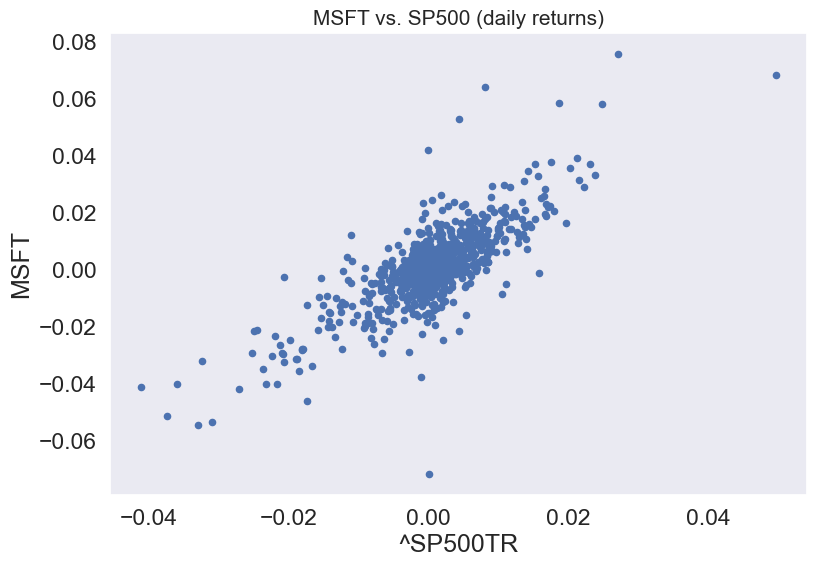

In [56]:
# at first let's visualize the relationship
# using the returns of the SP500 as the independent variable (x-axis)
ret.plot(x = "^SP500TR", y = "MSFT", figsize = (9, 6), kind = "scatter")
plt.grid()
plt.title("MSFT vs. SP500 (daily returns)", fontsize = 15)
plt.show()

In [57]:
# calculation correlation coefficient an p_value (t-test)
r, p_value = stats.pearsonr(ret["^SP500TR"], ret.MSFT)

In [58]:
r

np.float64(0.781758490831477)

In [59]:
p_value 

np.float64(3.429669593059083e-156)

The relatively high correlation coefficient of 0.78 suggests a high positive relationship between SP500 and Microsoft stock price. The p-value is pretty much equal to zero (e-156 at the end shows that we're having a very small number) which means we can reject the null-hypothesis. Therefore we can conclude that there is a significant relationship between S&P 500 index returns and the Microsoft stock returns.

__The linear regression model for our example:__

<img src="../assets/images/lin_reg_sp500_MSFT.png" width="40%" />


__The returns for the Microsoft stock are equal__

- to the intercept a 

- plus the slope coefficient beta times the returns of the S&P500-index

- plus the error terms epsilon

***The slope coefficient beat is the famous and commonly used beta factor of a stock and beta measures the increase in Microsoft stock returns.***

The market return increases by one unit so by one percentage point.

Typically stocks co-move with the market and have a positive beta and a __beta greater then one__ means that the stock actually overreacts the market and therefore is a highly cyclical stock.


In [60]:
# creating our regression model with stats.linregress
# returns of the S&P500-index as x-parameter
# returns of MSFT as y-parameter
beta, intercept, rvalue, pvalue, stderr = stats.linregress(x = ret["^SP500TR"], y = ret.MSFT)

In [61]:
beta # beta which is the slope coefficient

np.float64(1.3582000160803998)

A beta with a value of 1.358 means that when the S&P500-index return increases by one percentage point (1%), we would expect an increase of the Microsoft Return of one point three five percentage points (1.358%).

In [62]:
intercept # for the intercept we have here a value close to zero

np.float64(0.00046771884621189797)

In [63]:
rvalue # calculating the correlation coefficient returns 0.78

np.float64(0.781758490831477)

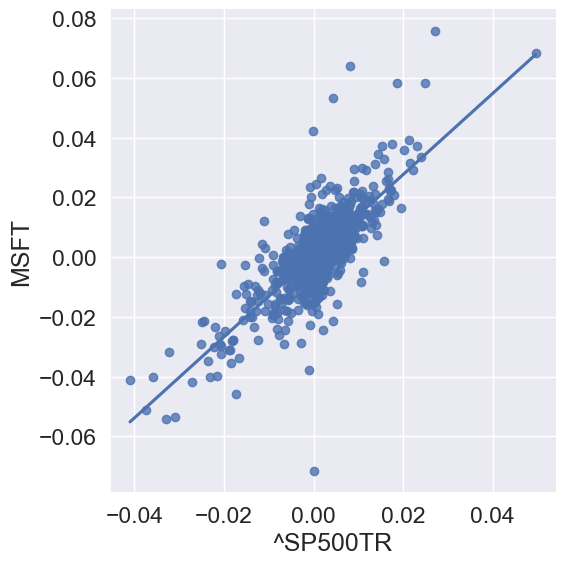

In [64]:
# visualizing the linear regression model with seaborn
sns.set(font_scale=1.5)
sns.lmplot(data = ret, x = "^SP500TR", y = "MSFT", height = 6, ci = None)
plt.show()